In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys

from tqdm import tqdm
import pickle
import h5py

import numpy as np
from astropy.cosmology import Planck18
from astropy import units as u
from astropy import constants as const

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file('../matplotlibrc')

In [2]:
wdir = os.environ['DM21CM_DIR']
sys.path.append(wdir)
#sys.path.append(wdir + "/build_tf")
sys.path.append(os.environ['DH_DIR'])
data_dir = '/n/holyscratch01/iaifi_lab/yitians/dm21cm/DM21cm/data/tf/zf01/data'

In [3]:
from dm21cm.utils import load_h5_dict, save_h5_dict

In [4]:
dz = np.load("../data/sfrd/Interpolators_0926_2.npz", allow_pickle=True)

In [5]:
d = load_h5_dict("../data/sfrd/sfrd_tables_old.h5")

In [22]:
d['r_range'].shape

(128,)

In [28]:
d['r_range']

array([1.00000000e-01, 4.13070866e+00, 8.16141732e+00, 1.21921260e+01,
       1.62228346e+01, 2.02535433e+01, 2.42842520e+01, 2.83149606e+01,
       3.23456693e+01, 3.63763780e+01, 4.04070866e+01, 4.44377953e+01,
       4.84685039e+01, 5.24992126e+01, 5.65299213e+01, 6.05606299e+01,
       6.45913386e+01, 6.86220472e+01, 7.26527559e+01, 7.66834646e+01,
       8.07141732e+01, 8.47448819e+01, 8.87755906e+01, 9.28062992e+01,
       9.68370079e+01, 1.00867717e+02, 1.04898425e+02, 1.08929134e+02,
       1.12959843e+02, 1.16990551e+02, 1.21021260e+02, 1.25051969e+02,
       1.29082677e+02, 1.33113386e+02, 1.37144094e+02, 1.41174803e+02,
       1.45205512e+02, 1.49236220e+02, 1.53266929e+02, 1.57297638e+02,
       1.61328346e+02, 1.65359055e+02, 1.69389764e+02, 1.73420472e+02,
       1.77451181e+02, 1.81481890e+02, 1.85512598e+02, 1.89543307e+02,
       1.93574016e+02, 1.97604724e+02, 2.01635433e+02, 2.05666142e+02,
       2.09696850e+02, 2.13727559e+02, 2.17758268e+02, 2.21788976e+02,
      

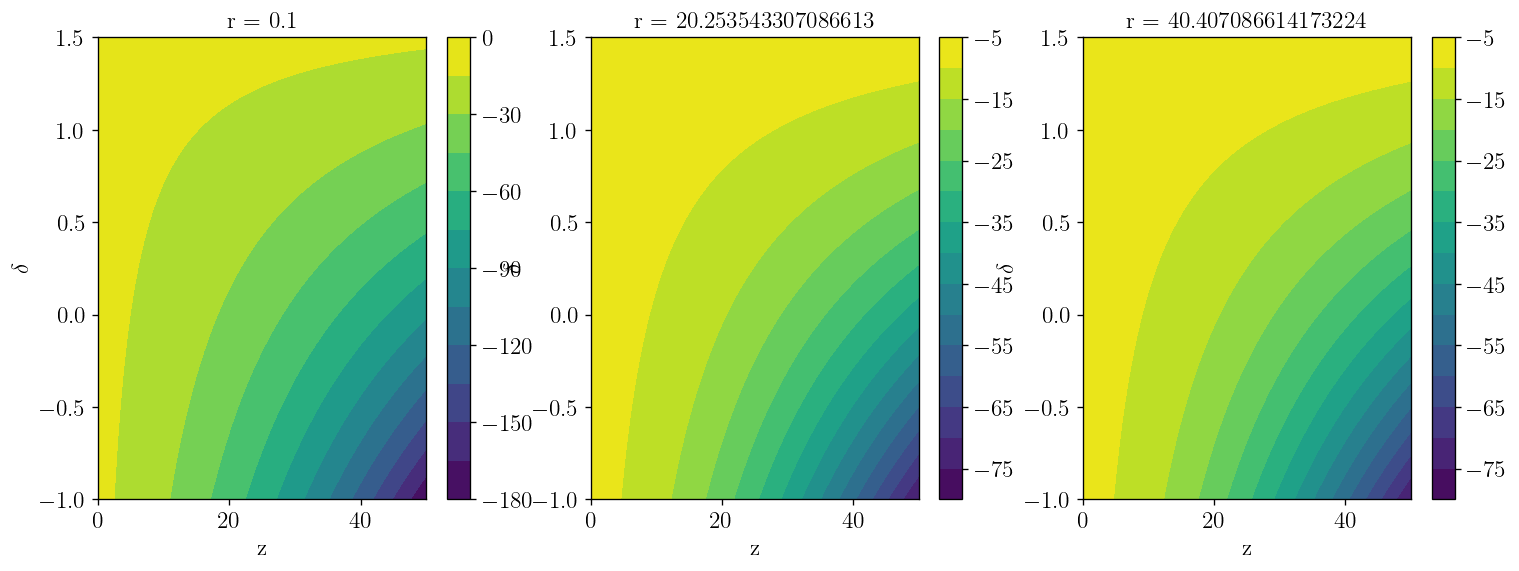

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
for i, iplot in enumerate([0, 5, 10]):
    ax = axs[i]
    im = ax.contourf(d['z_range'], d['delta_range'], np.transpose(np.log10(d['cond_sfrd_table'][:,:,iplot])), levels=15)
    ax.set(xlabel='z', ylabel=r'$\delta$', title=f"r = {d['r_range'][iplot]}")
    fig.colorbar(im, ax=ax)

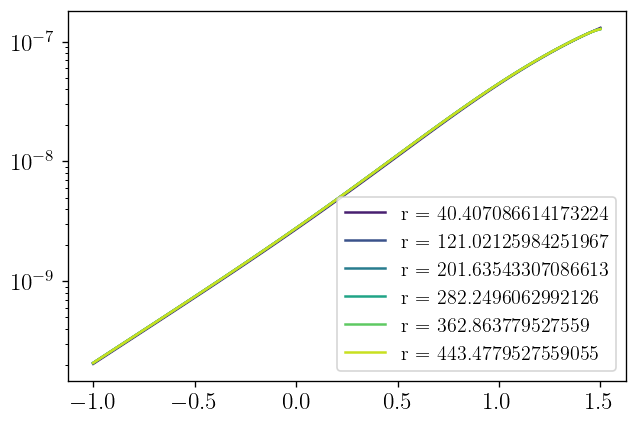

In [36]:
for i in np.arange(10, 120, 20):
    color = cms['viridis'](i/120)
    plt.plot(d['delta_range'], d['cond_sfrd_table'][10,:,i], label=f"r = {d['r_range'][i]}", color=color)
plt.yscale('log')
plt.legend()

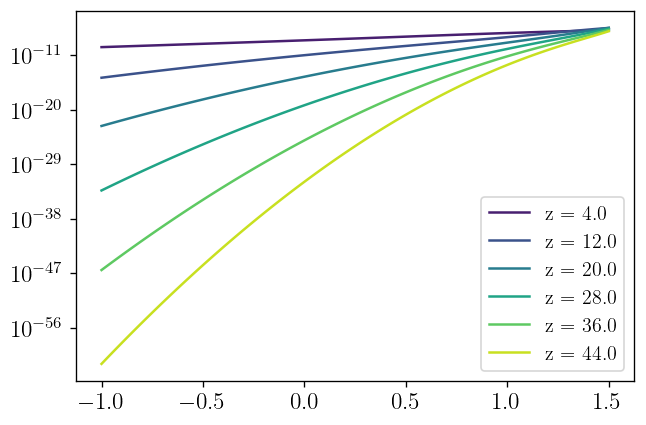

In [37]:
for i in np.arange(10, 120, 20):
    color = cms['viridis'](i/120)
    plt.plot(d['delta_range'], d['cond_sfrd_table'][i,:,60], label=f"z = {d['z_range'][i]}", color=color)
plt.yscale('log')
plt.legend()